<a href="https://colab.research.google.com/github/IsaacBurkholder/Modeling_In_Physics/blob/main/HW31_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best [[ 0.06044992 -0.17052341]
 [-0.17052341  0.632001  ]]


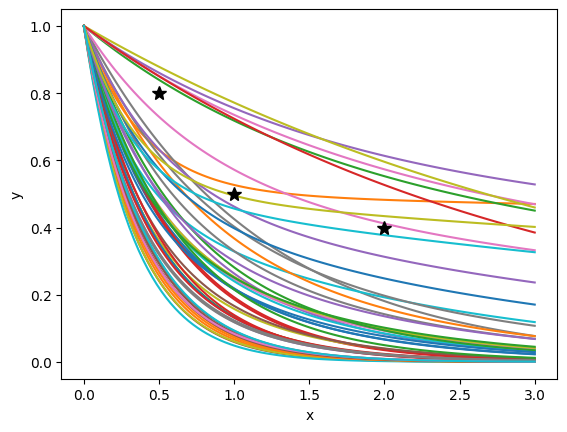

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

def f(t, theta1, theta2):
  return (np.exp(-theta1 * t) + np.exp(-theta2 *t))/2

init = [1.0,2.0]
t = np.array([.5,1,2])
y = np.array([.8,.5,.4])

fit = curve_fit(f, t, y, init)

print("Best",fit[-1])


for i in range(50):
  plt.plot(np.linspace(0,3,100), f(np.linspace(0,5,100), np.random.random()*2,
                                   np.random.random()*2), '-')
plt.plot(t, y, 'k*', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



When both $\theta_1$ and $\theta_2$ are 0, the model becomes a constant: 1. When one of the $\theta$ values gets larger, we get a simple exponential decay. When both $\theta$ values get really large, our problem goes to 0.

Our model may not ever be able to hit all of the truth values. Basically, we have a manifold of possible solutions in paramter space, and our truth value does not have to exist on the manifold. Instead, we opt for some sort of norm minimization.

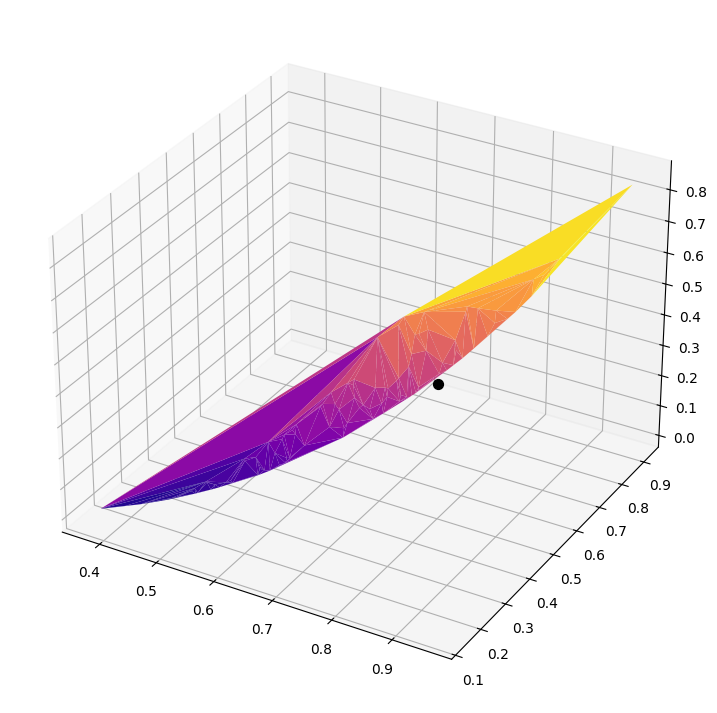

In [ ]:
T = np.random.rand(110,2)*2

Y = list(zip(*[[f(t[0],*i),f(t[1],*i),f(t[2],*i)] for i in T]))

fig, ax = plt.subplots(figsize=(9,9), subplot_kw=dict(projection='3d'))
ax.scatter(y[0],y[1],zs=y[2],s=50,c="k")
ax.plot_trisurf(*Y,cmap='plasma')
fig.show()

We can clearly see that the truth value doesn't lie on our model manifold. This means that there does not exist an exact solution, so we are forced to resort to a norm minimization instead.

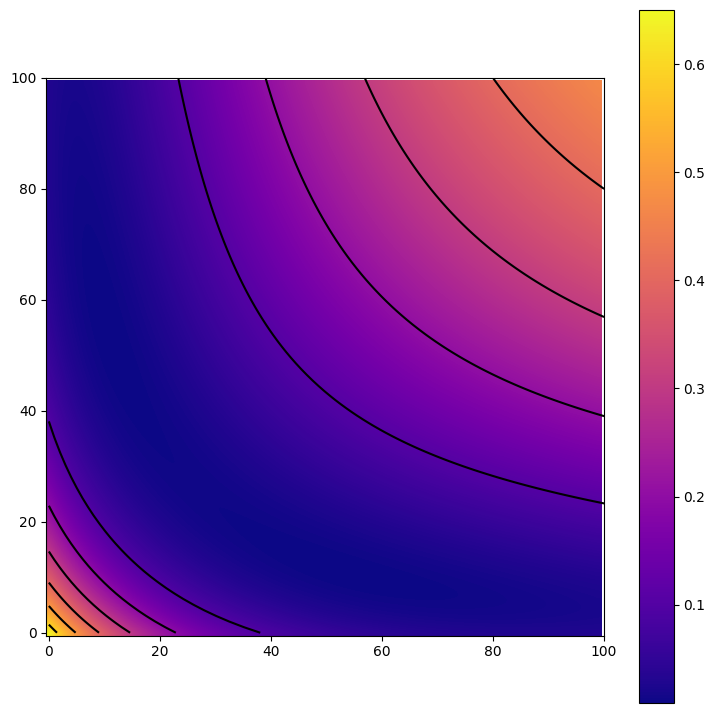

In [67]:
def L(t1,t2):
  return sum([(f(t[i],t1,t2)-y[i])**2 for i in range(3)])

T1 = np.linspace(0,2,100)
T2 = np.linspace(0,2,100)

A, B = np.meshgrid(T1,T2)

fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(L(A,B), cmap='plasma',interpolation="bicubic",origin='lower')
con = ax.contour(A*50,B*50, L(A, B),colors='k')
fig.colorbar(im, ax=ax)
fig.show()

In [ ]:
mini = np.argmin(L(A,B), axis=0)
minmin = np.argmin(L(A,B), axis=1)
mins = [L(A[minmin[i],minmin[i]],B[minmin[i],minmin[i]]) for i in range(len(mini))]
arg = np.argmin(mins)

print("The minimum loss parameter values are",A[arg][arg],"and",B[arg][arg])

The minimum loss parameter values are 0.5454545454545455 and 0.5454545454545455
